In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
data_path = 'csv_data/'
THREE_K = '_3k'
TWENTY_K = '_20k'
HUNDRED_K = '_100k'

In [10]:
size = TWENTY_K

In [4]:
track_df = None

In [56]:
track_df = pd.read_csv(data_path + 'track_df' + size + '.csv').drop(columns=['Unnamed: 0'])

In [8]:
def df_list(df, name, size=None):
    if size is None:
        list_df = df.groupby('pid')[(name + '_uri')].apply(list).reset_index(name=(name + '_uri'))
        list_df = list_df.drop(columns=['pid'])
    else:
        list_df = pd.read_csv(data_path + 'list_df_' + name + size + '.csv', index_col=0)
        list_df[(name + '_uri')] = list_df[(name + '_uri')].str.strip('[]').str.split(',')
        
    return list_df

In [11]:
list_df_track = df_list(track_df, 'track', size)
list_df_artist = df_list(track_df, 'artist', size)
list_df_album = df_list(track_df, 'album', size)

In [60]:
list_df_track.to_csv(data_path + 'list_df_track' + size + '.csv')
list_df_artist.to_csv(data_path + 'list_df_artist' + size + '.csv')
list_df_album.to_csv(data_path + 'list_df_album' + size + '.csv')

In [6]:
def unique_vals(df, sub_size, name, size=None):
    if size is None:
        unique_vals = []
        last_elem = None
        checkpoint_list = list(range(0,int(len(df)), sub_size))

        for i in checkpoint_list:
            sub_series = df.iloc[i:i+sub_size][(name + '_uri')]
            if last_elem is not None:
                sub_series = pd.concat([pd.Series([last_elem]), sub_series])

            sub_cum = sub_series.cumsum()
            last_elem = sub_cum.iloc[-1]
            sub_sets = sub_cum.apply(set)
            
            if last_elem is not None:
                unique_vals.append(sub_sets.apply(len).tolist()[1:])
            
        unique_vals = pd.DataFrame(np.concatenate(unique_vals))
    else:
        unique_vals = pd.read_csv(data_path + 'unique_' + name + '_vals' + size + '.csv', index_col=0)
        
    return unique_vals

In [76]:
list_df_track

,track_uri
0,"['spotify:track:0UaMYEvWZi0ZqiDOoHU3YI', 'spo..."
1,"['spotify:track:2HHtWyy5CgaQbC7XSoOb0e', 'spo..."
2,"['spotify:track:74tqql9zP6JjF5hjkHHUXp', 'spo..."
3,"['spotify:track:4WJ7UMD4i6DOPzyXU5pZSz', 'spo..."
4,"['spotify:track:4iCGSi1RonREsPtfEKYj5b', 'spo..."
...,...
19995,"['spotify:track:64j3Bd62HTe0pclk8Aq9BE', 'spo..."
19996,"['spotify:track:09OojFvtrM9YRzRjnXqJjA', 'spo..."
19997,"['spotify:track:4lNznSUjByH5zWpPZFFeff', 'spo..."
19998,"['spotify:track:1yy2DlSDtEt90d54rPDPXz', 'spo..."


In [12]:
%%time
vals_track = unique_vals(list_df_track, 200, 'track', size)
vals_artist = unique_vals(list_df_artist, 200, 'artist', size)
vals_album = unique_vals(list_df_album, 200, 'album', size)

CPU times: user 22.9 ms, sys: 6.51 ms, total: 29.5 ms
Wall time: 39.2 ms


In [10]:
vals_track.to_csv(data_path + 'unique_track_vals' + size + '.csv')
vals_artist.to_csv(data_path + 'unique_artist_vals' + size + '.csv')
vals_album.to_csv(data_path + 'unique_album_vals' + size + '.csv')

In [13]:
def forward(x):
    return x**(1/2)

def inverse(x):
    return x**2

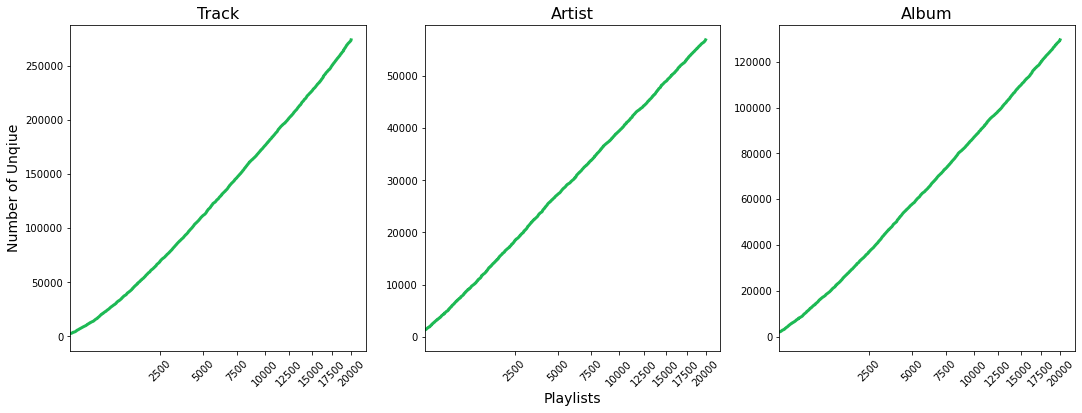

In [75]:
fig, axs = plt.subplots(1,3, figsize=(18,6))

axs[0].plot(vals_track.index, vals_track.values, color='#1DB954', linewidth=3)
axs[1].plot(vals_artist.index, vals_artist.values, color='#1DB954', linewidth=3)
axs[2].plot(vals_album.index, vals_album.values, color='#1DB954', linewidth=3)

axs[0].set_xscale('function', functions=(forward, inverse))
axs[0].tick_params(axis='x', rotation=45)
axs[1].set_xscale('function', functions=(forward, inverse))
axs[1].tick_params(axis='x', rotation=45)
axs[2].set_xscale('function', functions=(forward, inverse))
axs[2].tick_params(axis='x', rotation=45)

axs[0].set_title('Track', size=16)
axs[1].set_title('Artist', size=16)
axs[2].set_title('Album', size=16)

axs[0].set_ylabel('Number of Unqiue', size=14)
axs[1].set_xlabel('Playlists', size=14)

plt.show()